# basic Import

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# DataSet:


In [2]:
base_data_set = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=base_data_set.load_data()

# normalisation

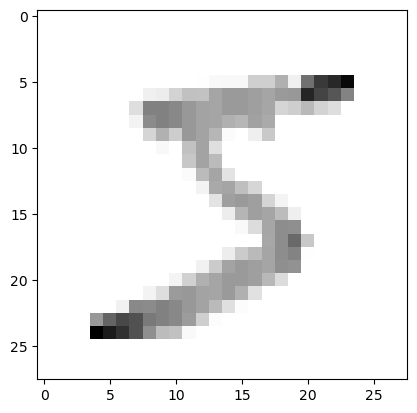

In [4]:
x_train = tf.keras.utils.normalize(x_train , axis =1)
x_test =tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [10]:
print(y_train[100])

5


# resizing:

In [5]:
image_size=28
x_train_resized =np.array(x_train).reshape(-1,image_size,image_size,1)
x_test_resized =np.array(x_test).reshape(-1,image_size,image_size,1)

# neural Network:

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,MaxPool2D

In [13]:
model=Sequential()

### first convolution layer

In [14]:
model.add(Conv2D(64,(3,3),input_shape=x_train_resized.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### second Convolution layer

In [15]:
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### third convolution Layer

In [16]:
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## flattern layer:

In [17]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

## first fully connected layer:

In [18]:
model.add(Dense(32))
model.add(Activation("relu"))

## second fully connected layer:

In [19]:
model.add(Dense(10))
model.add(Activation("softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [21]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

model.fit(x_train_resized,y_train,epochs=5,validation_split=0.3)

In [22]:
model.fit(x_train_resized,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 51s 32ms/step - loss: 0.3326 - accuracy: 0.8947 - val_loss: 0.1378 - val_accuracy: 0.9563
Epoch 2/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.1049 - accuracy: 0.9676 - val_loss: 0.0943 - val_accuracy: 0.9715
Epoch 3/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0784 - accuracy: 0.9754 - val_loss: 0.0786 - val_accuracy: 0.9768
Epoch 4/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0626 - accuracy: 0.9814 - val_loss: 0.0943 - val_accuracy: 0.9724
Epoch 5/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0537 - accuracy: 0.9829 - val_loss: 0.0631 - val_accuracy: 0.9812


In [23]:
test_loss,test_acc = model.evaluate(x_test_resized,y_test)
print(test_loss,test_acc)

313/313 [==============================] - 9s 5ms/step - loss: 0.0515 - accuracy: 0.9847
0.0514676570892334 0.9847000241279602


In [24]:
prediction=model.predict([x_test_resized])

313/313 [==============================] - 10s 5ms/step


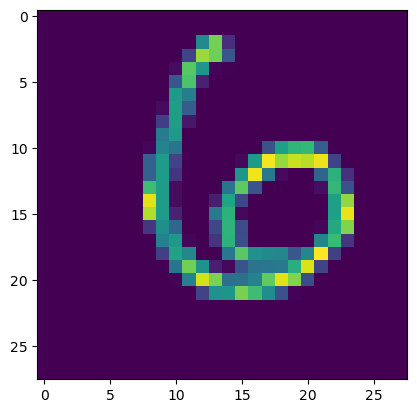

In [25]:
plt.imshow(x_test[100])

In [26]:
print(np.argmax(prediction[100]))

6


In [27]:

modelStructure = model.to_json()
file_save = Path("NumOCR_model1.json")
file_save.write_text(modelStructure, encoding="utf-8")

NameError: name 'Path' is not defined

In [30]:
model.save_weights("NumOcr_model_weight.h5")


In [35]:
from keras.models import load_model, save_model
# save_model(model, 'whole_NumOcr_model.h5')
model.save('whole_NumOcr_model.keras')


C:\Users\WINNER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
model.save('whole_NumOcr_model.h5')

In [1]:
import json
import numpy as np
from keras.models import load_model

# Assuming you have already loaded or created your model
# model = ...

# Get the weights as NumPy arrays
weights = model.get_weights()

# Convert NumPy arrays to lists, making sure they are JSON serializable
weights_as_lists = [arr.tolist() for arr in weights]

# Save the weights as JSON
with open("main_NumOcr_model_weight.json", "w") as json_file:
    json.dump(weights_as_lists, json_file)


NameError: name 'model' is not defined

In [39]:
## loading model to check:

In [6]:
from keras.models import load_model

# Replace 'model.h5' with the path to your saved model file
model101 = load_model('whole_NumOcr_model.h5')

# Now 'model' contains your loaded model, and you can use it for predictions or further training.


In [7]:
print(model101)

In [8]:
prediction1=model101.predict([x_test_resized])

313/313 [==============================] - 2s 6ms/step


In [11]:
print(np.argmax(prediction1[100]),prediction1[100].shape)

6 (10,)


In [14]:
print(x_test_resized.shape)

(10000, 28, 28, 1)


In [13]:
print(x_train.shape)

(60000, 28, 28)


In [43]:
import tensorflowjs as tfjs
from keras.models import load_model

# Load the Keras model
model_111 = load_model('whole_NumOcr_model.h5')

# Convert and save the model in TensorFlow.js format
tfjs.converters.save_keras_model(model_111, 'whole_NumOcr_model_json')


C:\Users\WINNER\AppData\Roaming\Python\Python311\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations